In [35]:
import pandas as pd
import numpy as np

In [36]:
dfins = pd.read_csv("insurance.csv")

In [37]:
dfins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [38]:
dfins.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [39]:
dfins.shape

(1000, 40)

Observation - There are 1000 rows and 40 columns in the data set.

In [40]:
dfins.size

40000

In [41]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# preprocessing the Dataset by dealing with the missing values in the Dataset
dfins.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation - There are null values in _c39 

In [43]:
#Droping the nan values
#dfins.dropna(inplace = True)

In [44]:
# Checking the null values again
dfins.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation - There are no null values in the dataset.

In [45]:
dfins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [46]:
dfins.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# EDA



The columns policy_bind_date is of Object type we will convert it in int format for the proper prediction

In [47]:
dfins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [48]:
# extracting Day 
dfins["Journey_day"] = pd.to_datetime(dfins.policy_bind_date, format ="%d-%m-%Y").dt.day

# extracting month 
dfins["Journey_month"] = pd.to_datetime(dfins.policy_bind_date, format ="%d-%m-%Y").dt.month

# extracting year
dfins["Journey_year"] = pd.to_datetime(dfins.policy_bind_date, format ="%d-%m-%Y").dt.year

In [49]:
dfins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Journey_day,Journey_month,Journey_year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,NaN,17,10,2014
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,NaN,27,6,2006
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,NaN,6,9,2000
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,25,5,1990
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,NaN,6,6,2014


In [50]:
dfins.drop(["policy_bind_date"] ,axis =1 ,inplace=True)



In [51]:
dfins.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Journey_day,Journey_month,Journey_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,13020,52080,Saab,92x,2004,Y,NaN,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,3510,Mercedes,E400,2007,Y,NaN,27,6,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3850,23100,Dodge,RAM,2007,N,NaN,6,9,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,25,5,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,650,4550,Accura,RSX,2009,N,NaN,6,6,2014


# Handling Categorical Data

In [52]:
dfins["auto_make"].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

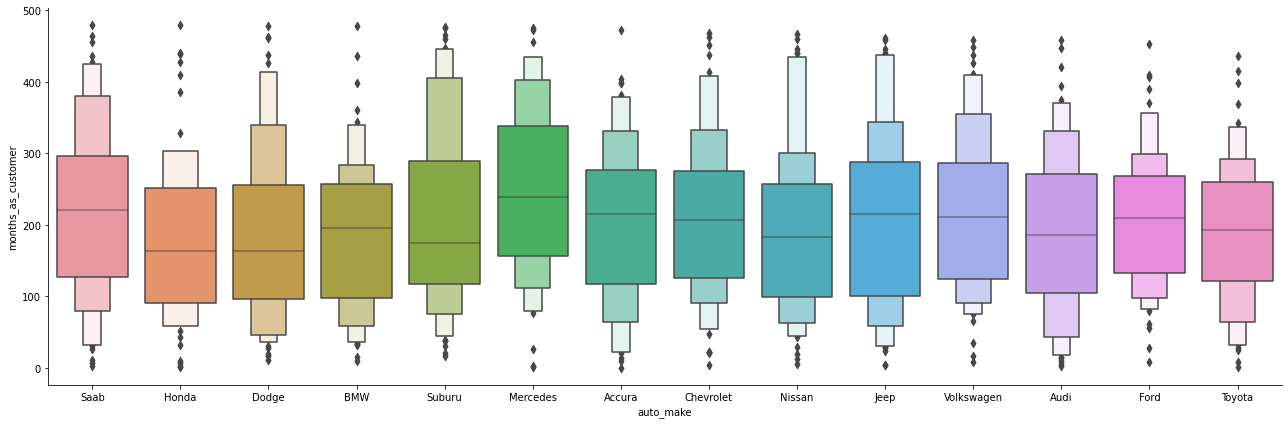

In [53]:
# months_as_customer vs auto_make
sns.catplot(y = "months_as_customer", x = "auto_make", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [54]:
# As auto_make is Nominal Categorical data we will perform OneHotEncoding

autoMake = dfins[["auto_make"]]

autoMake = pd.get_dummies(autoMake, drop_first= True)

autoMake.head()

,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfins["auto_model"].value_counts()

In [21]:
# months_as_customer vs auto_make
sns.catplot(y = "months_as_customer", x = "auto_model", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

ValueError: Could not interpret input 'auto_model'

In [ ]:
# As auto_make is Nominal Categorical data we will perform OneHotEncoding

autoModel = dfins[["auto_model"]]

autoModel = pd.get_dummies(autoModel, drop_first= True)

autoModel.head()

In [14]:
dfins.drop(["auto_model"],axis= 1 , inplace=True)

In [15]:
dfins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,2009,N,NaN


In [17]:
dfins['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [18]:
# As  is case of Ordinal Categorical type we perform LabelEncoder,We will use it in police_report_available
# Here Values are assigned with corresponding keys

dfins.replace({"YES": 0, "NO": 1, "?": 2}, inplace = True)


In [19]:
dfins['police_report_available']

0      0
1      2
2      1
3      1
4      1
      ..
995    2
996    2
997    0
998    0
999    2
Name: police_report_available, Length: 1000, dtype: int64

In [20]:
dfins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,0,71610,6510,13020,52080,Saab,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,2,5070,780,780,3510,Mercedes,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,Dodge,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,Chevrolet,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,Accura,2009,N,NaN


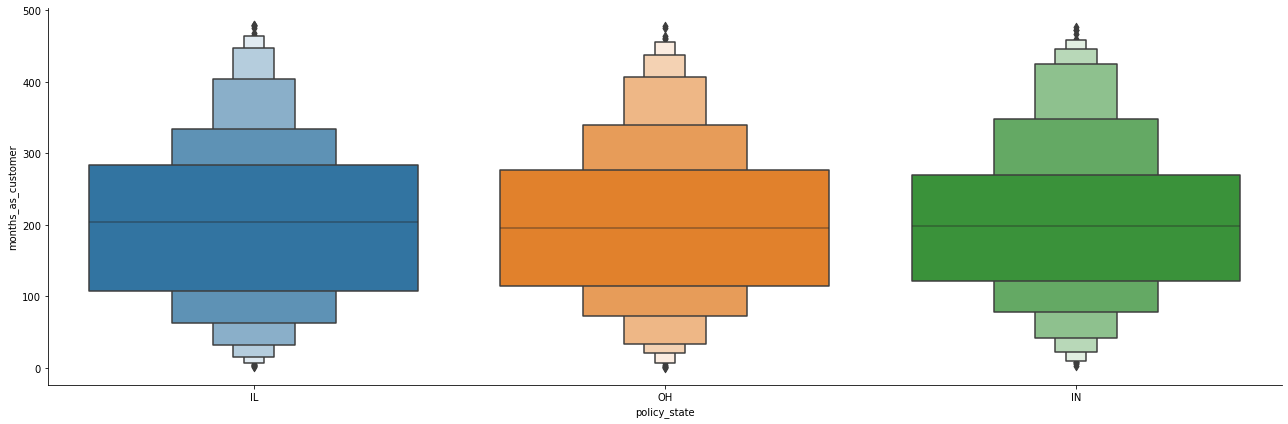

In [55]:
# Checking visual for policy_state
# months_as_customer vs auto_make
sns.catplot(y = "months_as_customer", x = "policy_state", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [56]:
# As  is case of Ordinal Categorical type we perform LabelEncoder,We will use it in policy_state
# Here Values are assigned with corresponding keys
dfins.replace({'IL':0,'OH':1,'IN':2},inplace =True)

In [57]:
dfins["policy_state"]

0      1
1      2
2      1
3      0
4      0
      ..
995    1
996    0
997    1
998    0
999    1
Name: policy_state, Length: 1000, dtype: int64

In [58]:
dfins.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Journey_day,Journey_month,Journey_year
0,328,48,521585,1,250/500,1000,1406.91,0,466132,MALE,...,13020,52080,Saab,92x,2004,Y,NaN,17,10,2014
1,228,42,342868,2,250/500,2000,1197.22,5000000,468176,MALE,...,780,3510,Mercedes,E400,2007,Y,NaN,27,6,2006
2,134,29,687698,1,100/300,2000,1413.14,5000000,430632,FEMALE,...,3850,23100,Dodge,RAM,2007,N,NaN,6,9,2000
3,256,41,227811,0,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,25,5,1990
4,228,44,367455,0,500/1000,1000,1583.91,6000000,610706,MALE,...,650,4550,Accura,RSX,2009,N,NaN,6,6,2014


In [61]:
# Changing the Ordinal data insured_sex
dfins['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [63]:
# As  is case of Ordinal Categorical type we perform LabelEncoder,We will use it in insured_sex
# Here Values are assigned with corresponding keys

dfins.replace({'FEMALE':0,'MALE':1},inplace = True)

In [64]:
dfins['insured_sex'].value_counts()

0    537
1    463
Name: insured_sex, dtype: int64

In [67]:
# As  is case of Ordinal Categorical type we perform LabelEncoder,We will use it in insured_sex
# Here Values are assigned with corresponding keys

dfins.replace({'Y':0,'N':1},inplace = True)

In [ ]:
# Removing the duplicate columns where we have already created the new columns from those relavant columns
dfins.drop(["auto_make","auto_model"],axis =1 ,inplace= True)

In [69]:
dfins.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39,Journey_day,Journey_month,Journey_year
0,328,48,521585,1,250/500,1000,1406.91,0,466132,1,...,71610,6510,13020,52080,2004,0,NaN,17,10,2014
1,228,42,342868,2,250/500,2000,1197.22,5000000,468176,1,...,5070,780,780,3510,2007,0,NaN,27,6,2006
2,134,29,687698,1,100/300,2000,1413.14,5000000,430632,0,...,34650,7700,3850,23100,2007,1,NaN,6,9,2000
3,256,41,227811,0,250/500,2000,1415.74,6000000,608117,0,...,63400,6340,6340,50720,2014,0,NaN,25,5,1990
4,228,44,367455,0,500/1000,1000,1583.91,6000000,610706,1,...,6500,1300,650,4550,2009,1,NaN,6,6,2014


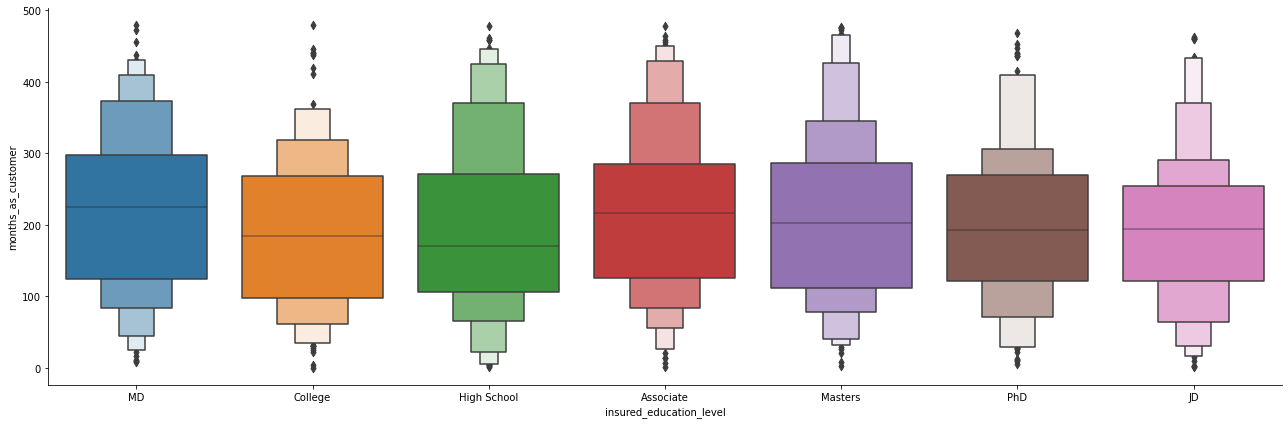

In [93]:
# months_as_customer vs insured_education_level
sns.catplot(y = "months_as_customer", x = "insured_education_level", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [104]:
# As insured_education_level is Nominal Categorical data we will perform OneHotEncoding

insurededucation = dfins[["insured_education_level"]]

insurededucation = pd.get_dummies(insurededucation, drop_first= True)

insurededucation.head()

,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,0


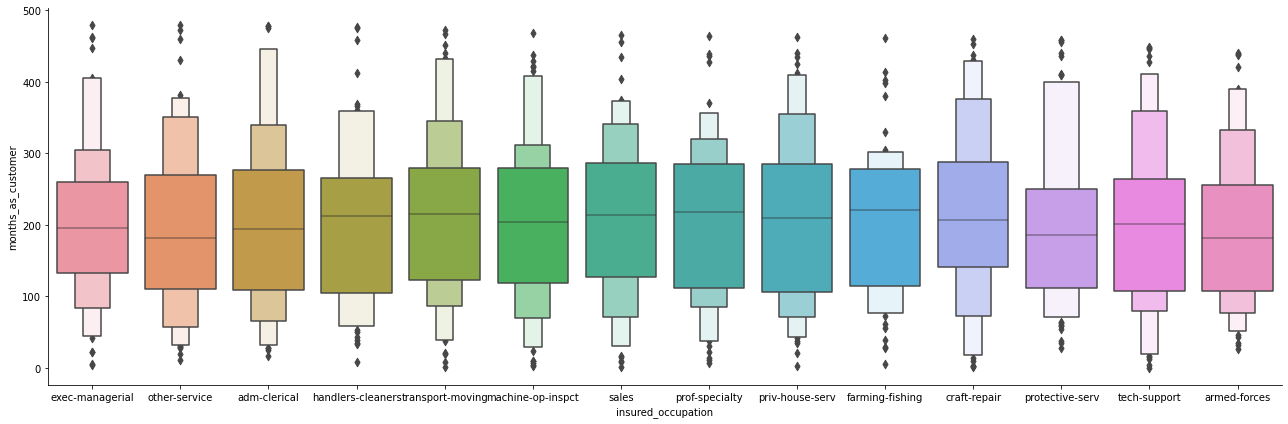

In [94]:
# months_as_customer vs insured_occupation
sns.catplot(y = "months_as_customer", x = "insured_occupation", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [105]:
# As insured_occupation is Nominal Categorical data we will perform OneHotEncoding

insuredOccupation = dfins[["insured_occupation"]]

insuredOccupation = pd.get_dummies(insuredOccupation, drop_first= True)

insuredOccupation.head()

,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0


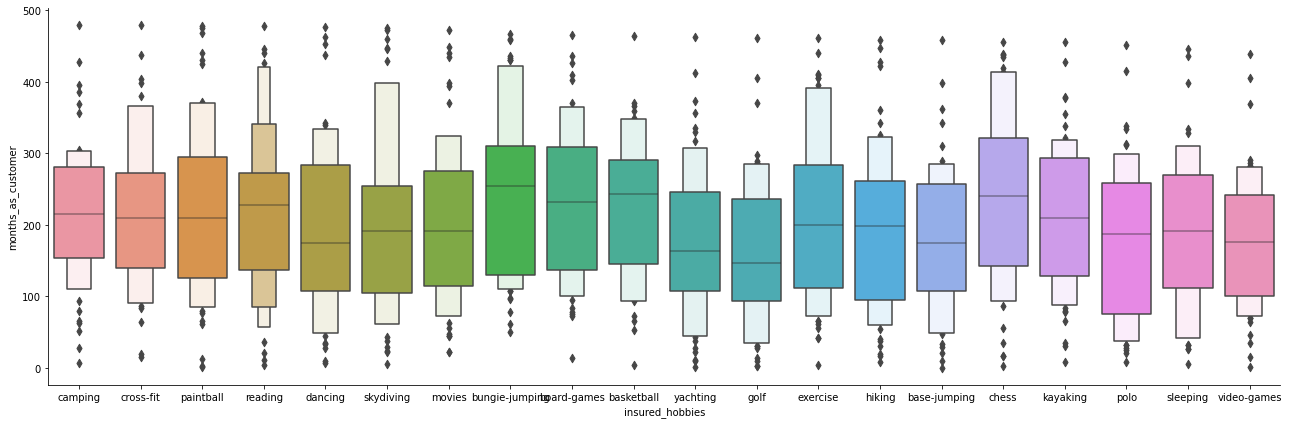

In [95]:
# months_as_customer vs insured_hobbies
sns.catplot(y = "months_as_customer", x = "insured_hobbies", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [108]:
#Observation - This information is not required for the model so we will drop this column.
dfins.drop(["insured_hobbies"],axis = 1,inplace = True)

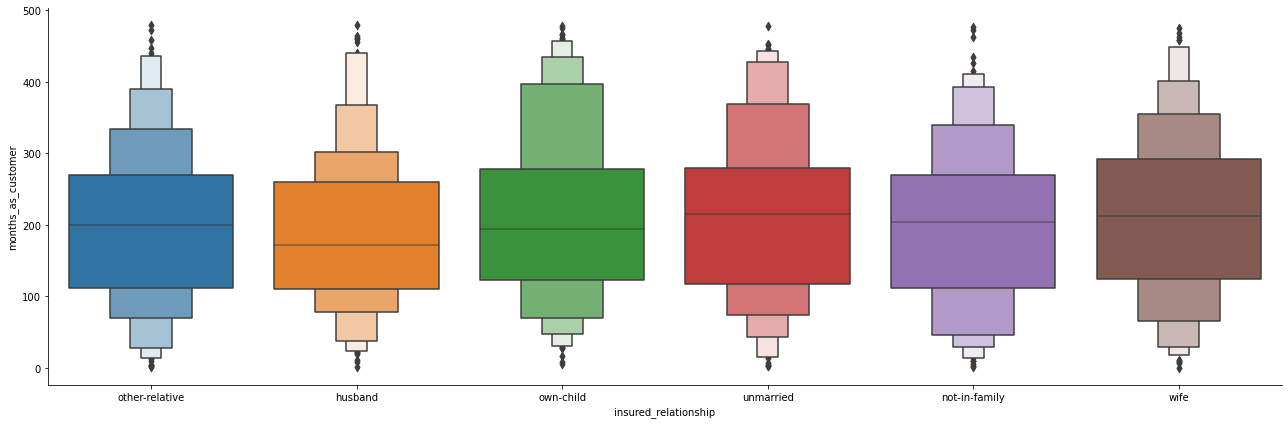

In [96]:
# months_as_customer vs insured_relationship
sns.catplot(y = "months_as_customer", x = "insured_relationship", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [109]:
# As insured_relationship is Nominal Categorical data we will perform OneHotEncoding

insuredRelationship = dfins[["insured_relationship"]]

insuredRelationship = pd.get_dummies(insuredOccupation, drop_first= True)

insuredRelationship.head()

,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0


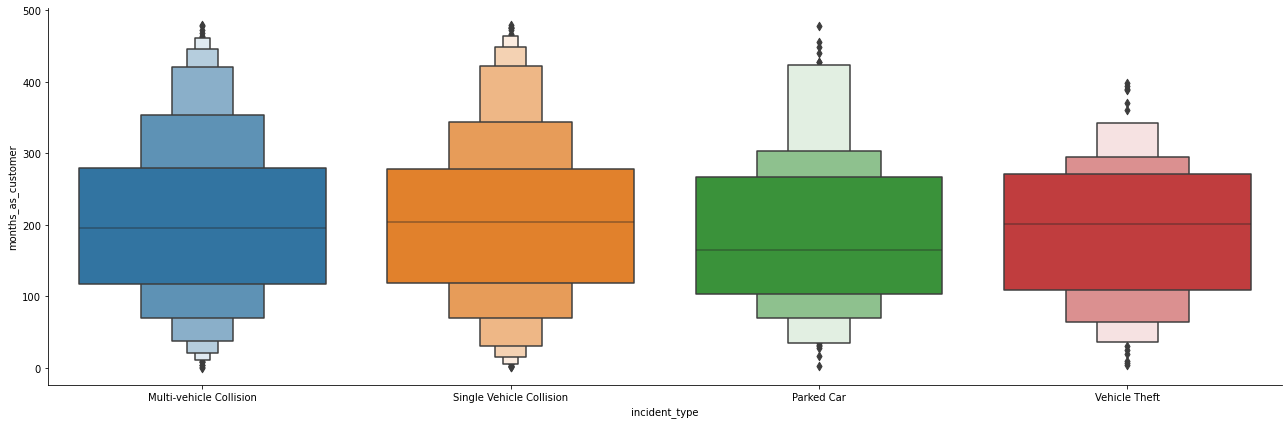

In [98]:
# months_as_customer vs insured_relationship
sns.catplot(y = "months_as_customer", x = "incident_type", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [110]:
# As incident_type is Nominal Categorical data we will perform OneHotEncoding

incidentType = dfins[["incident_type"]]

incidentType = pd.get_dummies(incidentType, drop_first= True)

incidentType.head()

,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft
0,0,1,0
1,0,0,1
2,0,0,0
3,0,1,0
4,0,0,1


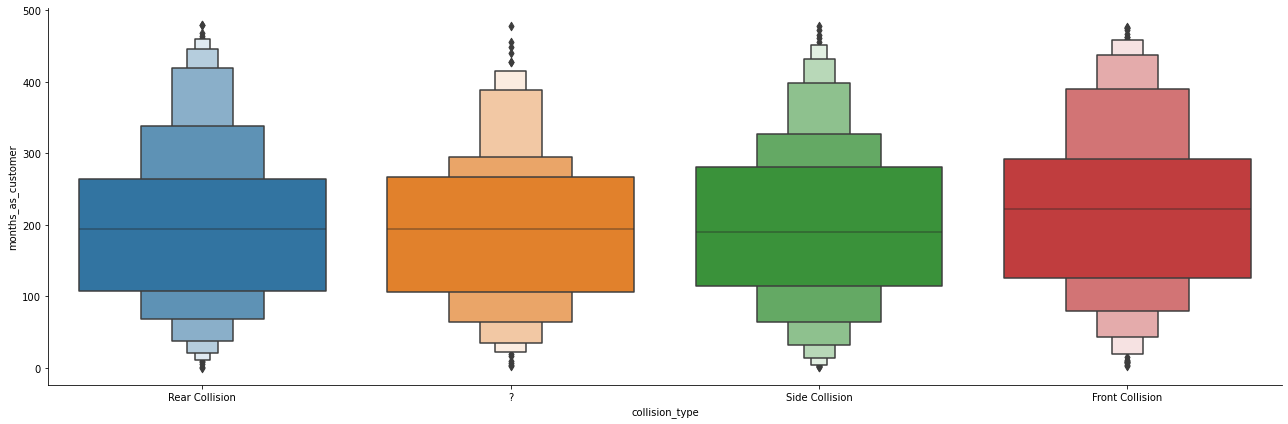

In [99]:
# months_as_customer vs collision_type
sns.catplot(y = "months_as_customer", x = "collision_type", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [111]:
# As collision_type is Nominal Categorical data we will perform OneHotEncoding

collisionType = dfins[["collision_type"]]

collisionType = pd.get_dummies(collisionType, drop_first= True)

collisionType.head()

,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision
0,0,0,1
1,0,0,0
2,0,1,0
3,1,0,0
4,0,0,0


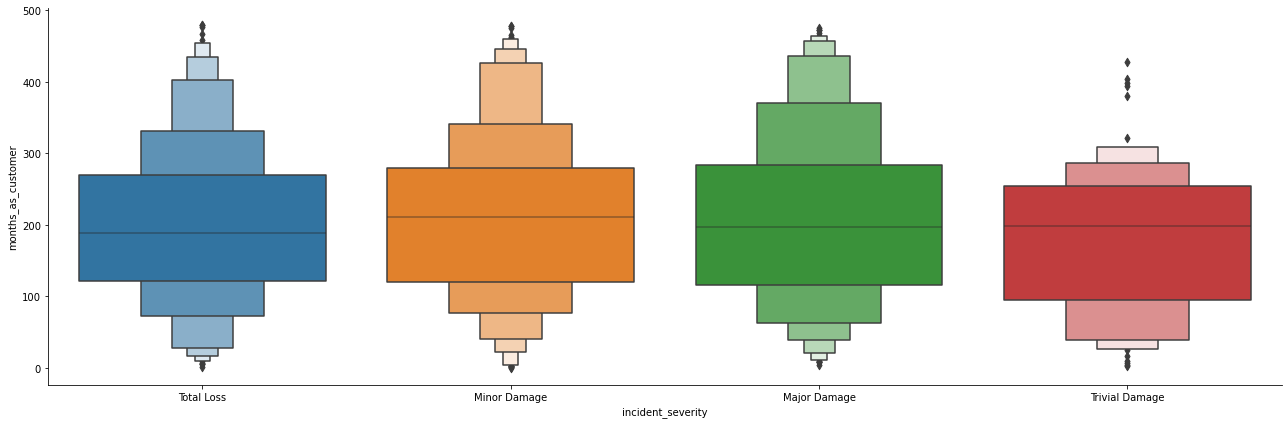

In [100]:
# months_as_customer vs incident_severity
sns.catplot(y = "months_as_customer", x = "incident_severity", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [112]:
# As collision_type is Nominal Categorical data we will perform OneHotEncoding

incidentSeverity = dfins[["incident_severity"]]

incidentSeverity = pd.get_dummies(incidentSeverity, drop_first= True)

incidentSeverity.head()

,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage
0,0,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,1,0,0


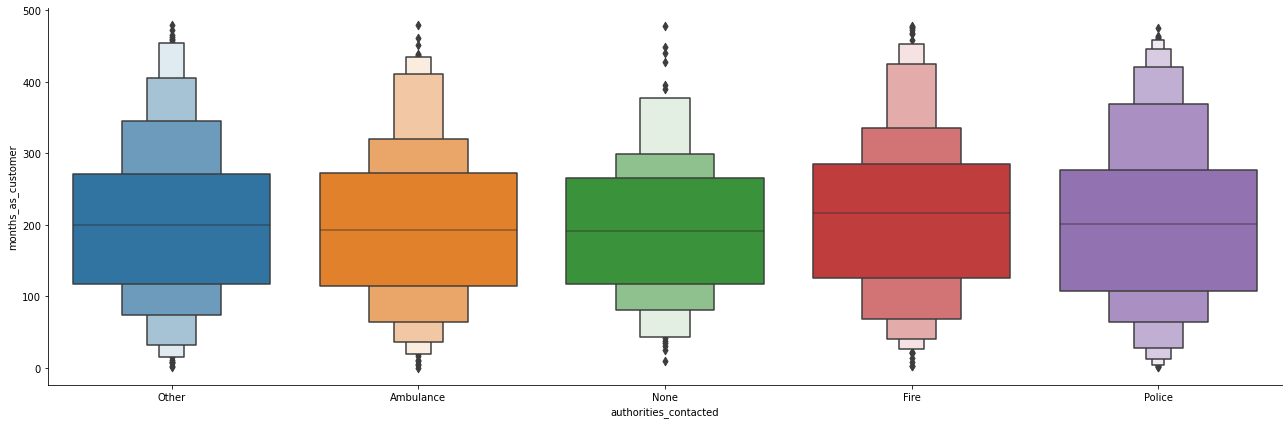

In [101]:
# months_as_customer vs authorities_contacted
sns.catplot(y = "months_as_customer", x = "authorities_contacted", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [113]:
# As collision_type is Nominal Categorical data we will perform OneHotEncoding

authoritieContacted = dfins[["authorities_contacted"]]

authoritieContacted = pd.get_dummies(authoritieContacted, drop_first= True)

authoritieContacted.head()

,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0


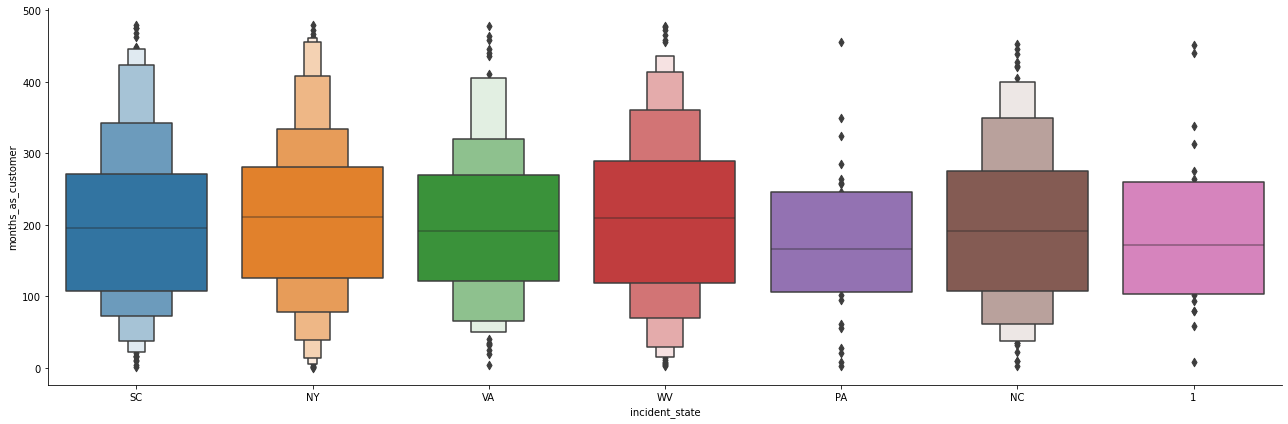

In [102]:
# months_as_customer vs authorities_contacted
sns.catplot(y = "months_as_customer", x = "incident_state", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [114]:
# As collision_type is Nominal Categorical data we will perform OneHotEncoding

incidentState = dfins[["incident_state"]]

incidentState = pd.get_dummies(incidentState, drop_first= True)

incidentState.head()

,incident_state_NC,incident_state_NY,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


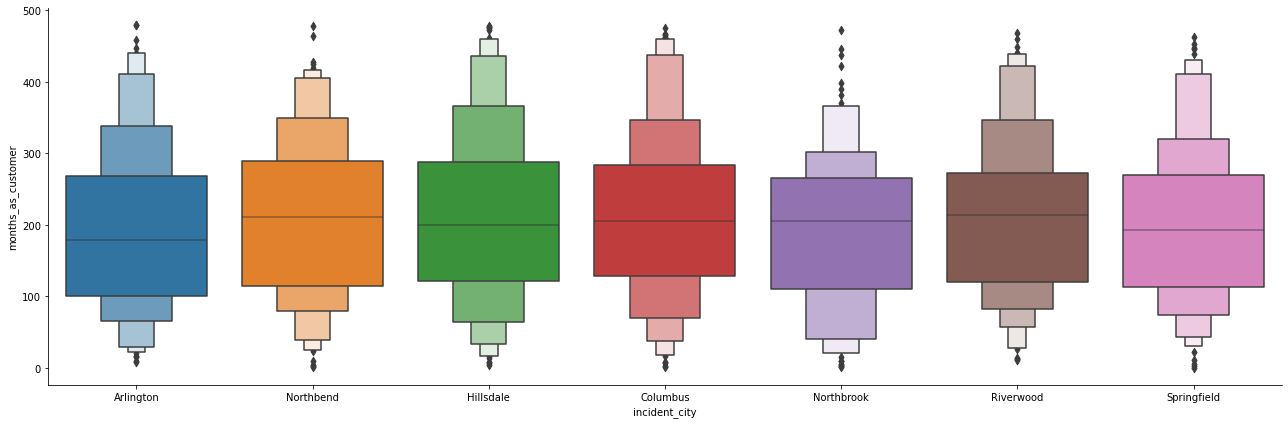

In [103]:
# months_as_customer vs authorities_contacted
sns.catplot(y = "months_as_customer", x = "incident_city", data = dfins.sort_values("months_as_customer", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [115]:
# As collision_type is Nominal Categorical data we will perform OneHotEncoding

incidentCity = dfins[["incident_city"]]

incidentCity = pd.get_dummies(incidentCity, drop_first= True)

incidentCity.head()

,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [73]:
dfins.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39,Journey_day,Journey_month,Journey_year
0,328,48,521585,1,250/500,1000,1406.91,0,466132,1,...,71610,6510,13020,52080,2004,0,NaN,17,10,2014
1,228,42,342868,2,250/500,2000,1197.22,5000000,468176,1,...,5070,780,780,3510,2007,0,NaN,27,6,2006
2,134,29,687698,1,100/300,2000,1413.14,5000000,430632,0,...,34650,7700,3850,23100,2007,1,NaN,6,9,2000
3,256,41,227811,0,250/500,2000,1415.74,6000000,608117,0,...,63400,6340,6340,50720,2014,0,NaN,25,5,1990
4,228,44,367455,0,500/1000,1000,1583.91,6000000,610706,1,...,6500,1300,650,4550,2009,1,NaN,6,6,2014


In [74]:
dfins.isnull().values.any()

True

In [77]:
dfins['_c39'].fillna("0", inplace = True)

In [78]:
dfins['_c39'].isnull().values.any()

False

In [79]:
dfins.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39,Journey_day,Journey_month,Journey_year
0,328,48,521585,1,250/500,1000,1406.91,0,466132,1,...,71610,6510,13020,52080,2004,0,0,17,10,2014
1,228,42,342868,2,250/500,2000,1197.22,5000000,468176,1,...,5070,780,780,3510,2007,0,0,27,6,2006
2,134,29,687698,1,100/300,2000,1413.14,5000000,430632,0,...,34650,7700,3850,23100,2007,1,0,6,9,2000
3,256,41,227811,0,250/500,2000,1415.74,6000000,608117,0,...,63400,6340,6340,50720,2014,0,0,25,5,1990
4,228,44,367455,0,500/1000,1000,1583.91,6000000,610706,1,...,6500,1300,650,4550,2009,1,0,6,6,2014


In [81]:
# Checking the data types for furthere data analysis
dfins.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int64
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

In [ ]:
# As we have updated the categorigal data we will remove its initial columns which were of Object datatypes for further modeling
dfins.drop(["insured_education_level","insured_occupation","insured_relationship","incident_date" ,"incident_type","collision_type","incident_severity","authorities_contacted","authorities_contacted","incident_state","incident_city" ,"property_damage"],axis = 1 ,inplace=True)

In [128]:
# Concatination of all updated columns of our data frame
df_insurance_final = pd.concat([dfins, autoMake,insurededucation,insuredOccupation,insuredRelationship,incidentType,collisionType,incidentSeverity,authoritieContacted, incidentState ,incidentCity],axis =1)                

In [129]:
df_insurance_final.head(5)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield
0,328,48,521585,1,250/500,1000,1406.91,0,466132,1,...,0,1,0,0,1,0,0,0,0,0
1,228,42,342868,2,250/500,2000,1197.22,5000000,468176,1,...,0,0,1,0,0,0,0,0,1,0
2,134,29,687698,1,100/300,2000,1413.14,5000000,430632,0,...,0,0,0,0,1,0,0,0,0,0
3,256,41,227811,0,250/500,2000,1415.74,6000000,608117,0,...,0,0,0,0,0,0,0,0,0,0
4,228,44,367455,0,500/1000,1000,1583.91,6000000,610706,1,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# getting the columns left with object datatypes
df_insurance_final.select_dtypes(include='object').columns

Index(['policy_csl', 'police_report_available', '_c39'], dtype='object')

In [137]:
dfins["police_report_available"]

0      YES
1        ?
2       NO
3       NO
4       NO
      ... 
995      ?
996      ?
997    YES
998    YES
999      ?
Name: police_report_available, Length: 1000, dtype: object

In [138]:
df_insurance_final.replace({'YES':0,'NO':1,'?':2},inplace =True)

In [142]:
# droping the unrelevant columns
df_insurance_final.drop(['policy_csl',"_c39"],axis =1,inplace = True)

In [143]:
df_insurance_final.dtypes

months_as_customer           int64
age                          int64
policy_number                int64
policy_state                 int64
policy_deductable            int64
                             ...  
incident_city_Hillsdale      uint8
incident_city_Northbend      uint8
incident_city_Northbrook     uint8
incident_city_Riverwood      uint8
incident_city_Springfield    uint8
Length: 95, dtype: object

In [144]:
df_insurance_final.select_dtypes(include='object').columns

Index([], dtype='object')

# Feature Selection

In [147]:
df_insurance_final["fraud_reported"]

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: fraud_reported, Length: 1000, dtype: int64

In [146]:
df_insurance_final.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'Journey_day', 'Journey_month',
       'Journey_year', 'auto_make_Audi', 'auto_make_BMW',
       'auto_make_Chevrolet', 'auto_make_Dodge', 'auto_make_Ford',
       'auto_make_Honda', 'auto_make_Jeep', 'auto_make_Mercedes',
       'auto_make_Nissan', 'auto_make_Saab', 'auto_make_Suburu',
       'auto_make_Toyota', 'auto_make_Volkswagen',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'ins

In [166]:
X = df_insurance_final.loc[:, ['months_as_customer', 'fraud_reported' ,'age', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'Journey_day', 'Journey_month',
       'Journey_year', 'auto_make_Audi', 'auto_make_BMW',
       'auto_make_Chevrolet', 'auto_make_Dodge', 'auto_make_Ford',
       'auto_make_Honda', 'auto_make_Jeep', 'auto_make_Mercedes',
       'auto_make_Nissan', 'auto_make_Saab', 'auto_make_Suburu',
       'auto_make_Toyota', 'auto_make_Volkswagen',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft',
       'collision_type_Front Collision', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'incident_severity_Minor Damage',
       'incident_severity_Total Loss', 'incident_severity_Trivial Damage',
       'authorities_contacted_Fire', 'authorities_contacted_None',
       'authorities_contacted_Other', 'authorities_contacted_Police',
       'incident_state_NC', 'incident_state_NY', 'incident_state_PA',
       'incident_state_SC', 'incident_state_VA', 'incident_state_WV',
       'incident_city_Columbus', 'incident_city_Hillsdale',
       'incident_city_Northbend', 'incident_city_Northbrook',
       'incident_city_Riverwood', 'incident_city_Springfield']]
X.head()

,months_as_customer,fraud_reported,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield
0,328,0,48,521585,1,1000,1406.91,0,466132,1,...,0,1,0,0,1,0,0,0,0,0
1,228,0,42,342868,2,2000,1197.22,5000000,468176,1,...,0,0,1,0,0,0,0,0,1,0
2,134,1,29,687698,1,2000,1413.14,5000000,430632,0,...,0,0,0,0,1,0,0,0,0,0
3,256,0,41,227811,0,2000,1415.74,6000000,608117,0,...,0,0,0,0,0,0,0,0,0,0
4,228,1,44,367455,0,1000,1583.91,6000000,610706,1,...,0,0,0,0,0,0,0,0,0,0


In [169]:
# Finding out dependent variable and assighning to y variable
y = df_insurance_final['total_claim_amount']
y.head()

0    71610
1     5070
2    34650
3    63400
4     6500
Name: total_claim_amount, dtype: int64

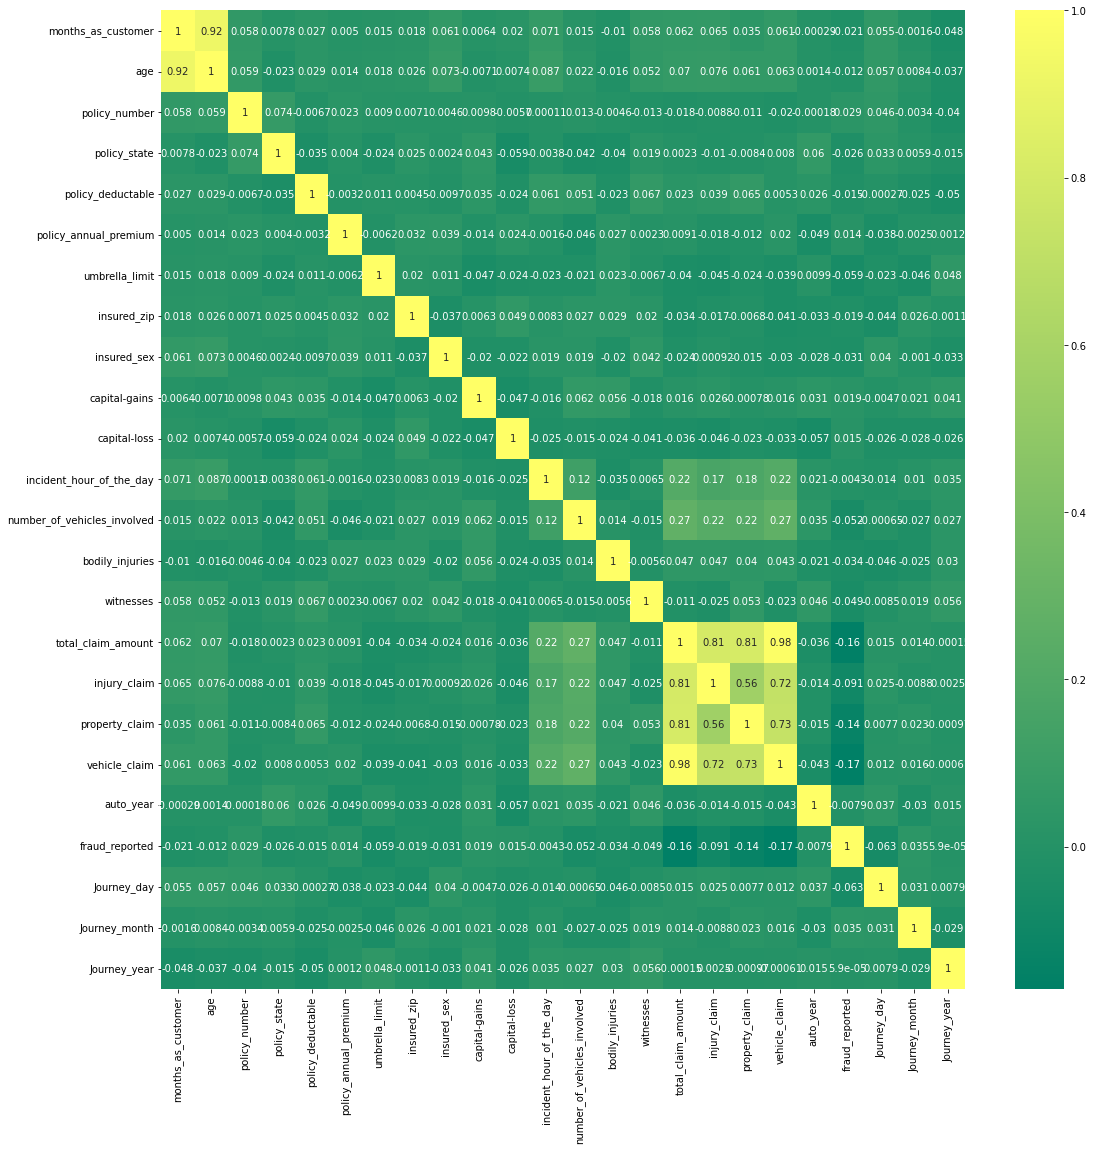

In [173]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(dfins.corr(),annot = True, cmap = "summer")

plt.show()

In [174]:


# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [175]:
print(selection.feature_importances_)

[9.38861245e-05 9.08892849e-05 9.34254046e-05 1.24111586e-04
 1.18628332e-04 9.58399671e-05 1.15337783e-04 1.13990258e-04
 1.62674271e-04 2.21660446e-04 1.04483252e-04 1.02489901e-04
 1.19889339e-04 1.44600051e-03 8.14789677e-05 1.51891045e-04
 1.95065436e-04 1.29358459e-01 1.24826729e-01 6.38674231e-01
 1.30848987e-04 1.35355121e-04 1.27247008e-04 1.06175037e-04
 2.12985875e-05 2.71787411e-05 4.95600530e-05 6.18851044e-05
 4.89053047e-05 9.41430900e-05 9.89328288e-05 5.68182687e-05
 7.79299981e-05 4.46167506e-05 3.93436978e-05 2.88396836e-05
 4.78318794e-05 4.97339763e-05 9.24139432e-05 1.13558969e-04
 7.10354425e-05 5.75141282e-05 6.04914424e-05 1.40941372e-05
 3.42659771e-05 1.25696662e-05 1.02343073e-05 1.63690250e-05
 1.46153251e-05 6.98918003e-06 1.25905900e-05 9.56714598e-06
 1.09280430e-05 2.56850816e-05 2.53441803e-05 2.35329848e-05
 3.16589836e-05 8.96651004e-06 1.40229439e-05 3.12439774e-05
 1.92452861e-05 1.41325646e-05 1.65203969e-05 2.56443447e-05
 3.65989404e-05 2.957512

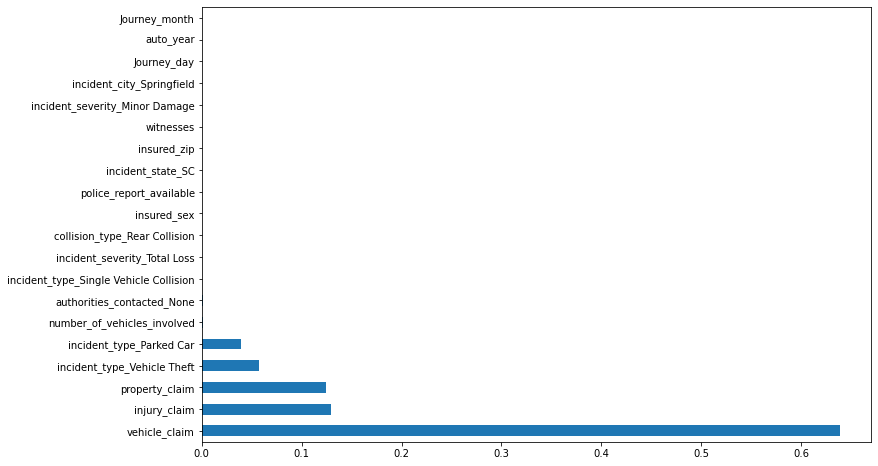

In [176]:


#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

In [177]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [178]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [179]:
y_pred = reg_rf.predict(X_test)

In [180]:
reg_rf.score(X_train, y_train)

0.9992817734010656

In [181]:
reg_rf.score(X_test, y_test)

0.9936577882552037

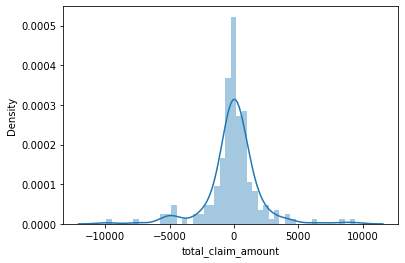

In [182]:


sns.distplot(y_test-y_pred)
plt.show()



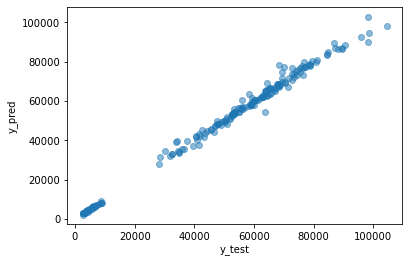

In [183]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [184]:
from sklearn import metrics

In [185]:


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1219.8825
MSE: 4220756.25335
RMSE: 2054.4479193569255


In [186]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.018207201707019685

In [187]:
metrics.r2_score(y_test, y_pred)

0.9936577882552037

# Hyperparameter Tuning

In [188]:
from sklearn.model_selection import RandomizedSearchCV

In [189]:


#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [190]:


# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [191]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [192]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [193]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [194]:
prediction = rf_random.predict(X_test)

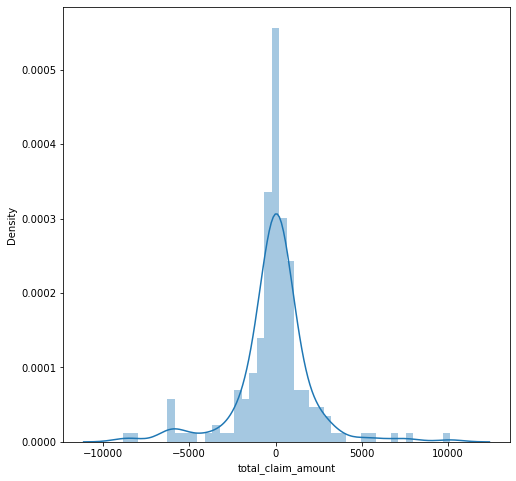

In [195]:


plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

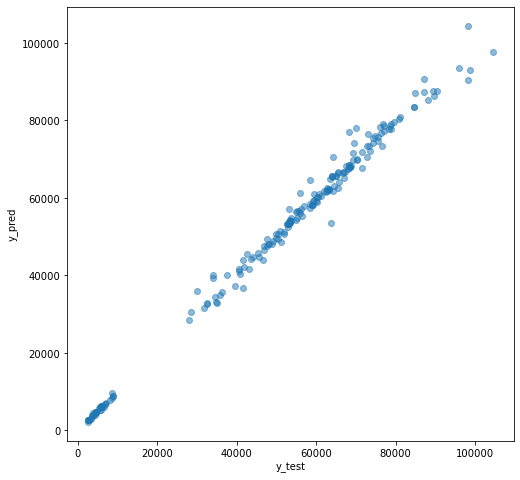

In [196]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [197]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1278.8405818506335
MSE: 4762537.91786325
RMSE: 2182.3239717932006


# Save the model

In [ ]:

import pickle
# open a file, where you want to store the data
file = open('INSURRANCE.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [ ]:

model = open('flight_rf.pkl','rb')
forest = pickle.load(model)


In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)